# Import Statements

In [73]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

## Read Data

In [27]:
data = pd.read_csv('data/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Cleaning

In [4]:
data.shape

(891, 12)

In [28]:
data = data.drop(['Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)
data.head()

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,male,22.0
1,2,1,1,female,38.0
2,3,1,3,female,26.0
3,4,1,1,female,35.0
4,5,0,3,male,35.0


In [29]:
data.Pclass.isna().values.any()

False

In [30]:
data.Sex.isna().values.any()

False

In [31]:
data.Age.isna().values.any()

True

In [34]:
data = data.dropna(subset=['Age'])
data.Age.isna().values.any()

False

In [35]:
data.shape

(714, 5)

In [39]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,male,22.0
1,2,1,1,female,38.0
2,3,1,3,female,26.0
3,4,1,1,female,35.0
4,5,0,3,male,35.0


In [44]:
data.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
dtype: object

In [50]:
data['Age'] = data['Age'].astype('int64')

In [51]:
data.dtypes

PassengerId     int64
Survived        int64
Pclass          int64
Sex            object
Age             int64
dtype: object

## Data Exploration and Visualization

In [70]:
grouped_data = data.groupby(['Survived']).agg({'Sex':pd.Series.count})
grouped_data.rename(columns={'Sex':'Count'}, inplace=True)

grouped_data

,Count
Survived,
0,424
1,290


In [85]:
surv_sex = data.groupby(['Sex','Survived']).agg({'Sex':pd.Series.count})
surv_sex.rename(columns={'Sex':'Count'}, inplace=True)

surv_sex

Count
Sex    Survived       
female 0            64
       1           197
male   0           360
       1            93

In [54]:
sex_count = data.groupby('Sex').agg({'Sex':pd.Series.count})
sex_count

,Sex
Sex,
female,261
male,453


In [57]:
fig = px.pie(labels=sex_count.index,
            values=sex_count.Sex,
            names=sex_count.index,
            title='Number of Male and Female Passengers(Cleaned Dataset)')
fig.update_layout({'plot_bgcolor': 'black',
                   'paper_bgcolor': 'black'})
fig.show()

c:\users\greatfaith church\appdata\local\programs\python\python38\lib\site-packages\plotly\express\_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



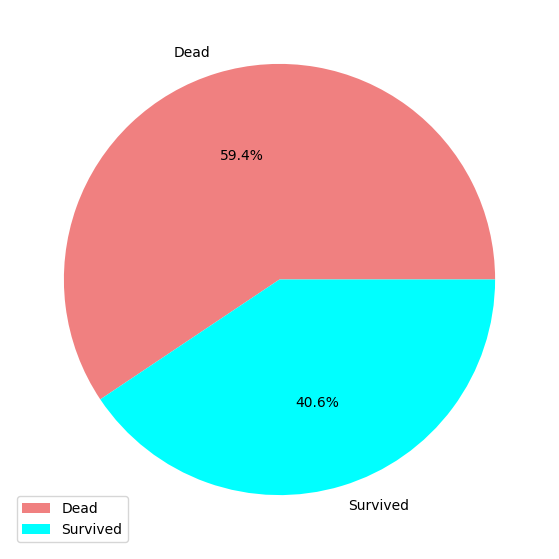

In [110]:
plt.figure(figsize=(14,7))
#fig, ax = plt.subplots()
plt.pie(grouped_data.Count, labels=['Dead', 'Survived'], autopct='%1.1f%%', colors=['lightcoral', 'cyan'])
plt.legend(loc="lower left")
plt.show()